In [1]:
import pandas as pd
import numpy as np
import os
import csv
import sys
import swifter

csv.field_size_limit(100000000)

131072

# Importing Dataset from Kaggle and FakeNewsCorpus 
# With Cleaning

In [3]:
corpus_csv = pd.read_csv('./work/Datasets/FakeNewsCorpusTrimmed/cleaned_data_titles.csv', usecols=['title', 'type'])
corpus_csv.columns = ['label', 'title']
corpus_csv.head(2)

,label,title
0,fake,Surprise: Socialist Hotbed Of Venezuela Has Lo...
1,fake,Water Cooler 1/25/18 Open Thread; Fake News ? ...


In [2]:
kaggle_csv = pd.read_csv('./work/Datasets/Combined_Dataset/combined_data.csv', usecols=['title', 'label'])
kaggle_csv.head(2)

,title,label
0,Four ways Bob Corker skewered Donald Trump,reliable
1,Linklater's war veteran comedy speaks to moder...,reliable


In [4]:
combined_title_df = pd.concat([corpus_csv, kaggle_csv])
combined_title_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4469371 entries, 0 to 4008
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   label   object
 1   title   object
dtypes: object(2)
memory usage: 102.3+ MB


In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import re

ps = PorterStemmer()

def clean_content(text):
    text = re.sub(r"http\S+", "", text)

    # Tokenize and Remove non alphanumeric characters
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
    tokens = tokenizer.tokenize(text)
    allalpha_tokens = [word for word in tokens if word.isalpha()]

    # Porter stemmer back to basic english words
    words = [ps.stem(word) for word in allalpha_tokens if not word in stopwords.words('english')]
    words = ' '.join(words)
    return words 
    

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
combined_title_df = combined_title_df.dropna()
combined_title_df.reset_index(drop=True, inplace=True)

combined_title_df['title'] = combined_title_df['title'].swifter.apply(lambda x: clean_content(x))

combined_title_df = combined_title_df.dropna()
combined_title_df.reset_index(drop=True, inplace=True)

combined_title_df

Pandas Apply:   0%|          | 0/4469211 [00:00<?, ?it/s]

,label,title
0,fake,surpris socialist hotb of venezuela ha lost ha...
1,fake,water cooler open thread fake new cnn still wo...
2,fake,veteran comment call out grow fox new it so ugli
3,fake,lost word hidden word otter bank book
4,fake,red alert bond yield are scream come
...,...,...
4469206,fake,trend watch
4469207,fake,trump jr is soon to give a speech for
4469208,fake,ron paul trump anarch altright
4469209,reliable,china accept oversea trial data bid speed drug...


In [7]:
combined_title_df.label.unique()

array(['fake', 'reliable', 'political', 'type'], dtype=object)

In [8]:
combined_title_df = combined_title_df[combined_title_df.label != 'type']

label_dict = {
    'political': 'reliable',
    'bias': 'fake',
    'unreliable': 'fake',
    'reliable': 'reliable',
    'fake': 'fake'
}

combined_title_df['label'] = combined_title_df['label'].swifter.apply(lambda x: label_dict[x])

combined_title_df = combined_title_df.dropna()
combined_title_df.reset_index(drop=True, inplace=True)

combined_title_df

Pandas Apply:   0%|          | 0/4469041 [00:00<?, ?it/s]

<ipython-input-8-00afff10c797>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_title_df['label'] = combined_title_df['label'].swifter.apply(lambda x: label_dict[x])


,label,title
0,fake,surpris socialist hotb of venezuela ha lost ha...
1,fake,water cooler open thread fake new cnn still wo...
2,fake,veteran comment call out grow fox new it so ugli
3,fake,lost word hidden word otter bank book
4,fake,red alert bond yield are scream come
...,...,...
4469036,fake,trend watch
4469037,fake,trump jr is soon to give a speech for
4469038,fake,ron paul trump anarch altright
4469039,reliable,china accept oversea trial data bid speed drug...


In [9]:
combined_title_df.to_csv('./work/Datasets/Combined_Dataset/processed_title.csv', mode='a', index=False)

print("Done Saving")

Done Saving


In [2]:
combined_title_df = pd.read_csv('./work/Datasets/Combined_Dataset/processed_title.csv', usecols=['label', 'title'])


combined_title_df

,label,title
0,fake,surpris socialist hotb of venezuela ha lost ha...
1,fake,water cooler open thread fake new cnn still wo...
2,fake,veteran comment call out grow fox new it so ugli
3,fake,lost word hidden word otter bank book
4,fake,red alert bond yield are scream come
...,...,...
4469036,fake,trend watch
4469037,fake,trump jr is soon to give a speech for
4469038,fake,ron paul trump anarch altright
4469039,reliable,china accept oversea trial data bid speed drug...


In [3]:
combined_title_df = combined_title_df.replace(to_replace='None', value=np.nan).dropna()

combined_title_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4466123 entries, 0 to 4469040
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   label   object
 1   title   object
dtypes: object(2)
memory usage: 102.2+ MB


In [4]:
combined_title_df['title'] = combined_title_df['title'].astype('string')
combined_title_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4466123 entries, 0 to 4469040
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   label   object
 1   title   string
dtypes: object(1), string(1)
memory usage: 102.2+ MB


In [19]:
# import re

# def making_string(x):
#     temp = re.sub('[^0-9a-zA-Z]+', ' ', x)
#     return temp.strip()

# combined_title_df['title'] = combined_title_df['title'].swifter.apply(lambda x: making_string(x))

# combined_title_df

Pandas Apply:   0%|          | 0/8938423 [00:00<?, ?it/s]

,Unnamed: 0,label,title
0,0.0,fake,surpris socialist hotb of venezuela ha lost ha...
1,1.0,fake,water cooler open thread fake new cnn still wo...
2,2.0,fake,veteran comment call out grow fox new it so ugli
3,3.0,fake,lost word hidden word otter bank book
4,4.0,fake,red alert bond yield are scream come
...,...,...,...
8938418,4469206.0,fake,trend watch
8938419,4469207.0,fake,trump jr is soon to give a speech for
8938420,4469208.0,fake,ron paul trump anarch altright
8938421,4469209.0,reliable,china accept oversea trial data bid speed drug...


# Modeling

In [5]:
import matplotlib.pyplot as plt
import itertools

# Applying confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(combined_title_df, test_size=0.3, random_state=42)

train_df

,label,title
13466,fake,real spider scale build with hi bare hand to s...
284504,reliable,live blog even edit clinton the bu tour
334532,reliable,demhillstaff favorit blog
3810777,reliable,a histori lesson
2263771,fake,expound power idea
...,...,...
1136904,fake,fed to eas as fear continu to propel gold silv...
1571360,reliable,countdown big weekend dc
2236477,reliable,with all due respect jame carvil is no expert ...
4307470,reliable,convict former goldman sach programm is overturn


In [7]:
X_train = train_df['title'].tolist()
Y_train = train_df['label'].tolist()
X_test = test_df['title'].tolist()
Y_test = test_df['label'].tolist()

## Naive Bayes Classifier with TF-IDF Vectorizer

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

bayes_model = Pipeline([('tfidf', TfidfVectorizer(max_features=5000,ngram_range=(1,3))), ('bayes', MultinomialNB())])

In [9]:
bayes_model = bayes_model.fit(X_train, Y_train)

Accuracy:    0.8310779594831311
Confusion matrix, without normalization


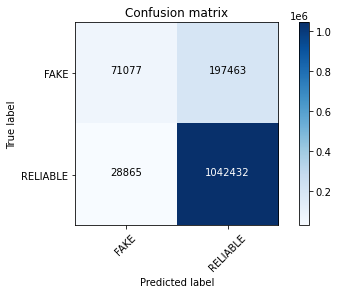

In [10]:
from sklearn import metrics

pred = bayes_model.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("Accuracy:   ", score)
cm = metrics.confusion_matrix(Y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'RELIABLE'])

## Linear SVM using SGDClassifier with TF-IDF Vectorizer
- Note that SGD is a optimization technique and not a ML model. It represents a way to train a model 

In [11]:
from sklearn.linear_model import SGDClassifier
svm_model = Pipeline([('tfidf', TfidfVectorizer(max_features=5000,ngram_range=(1,3))), ('svm', SGDClassifier(loss='hinge', alpha=1e-3, penalty='l2', random_state=42))])
svm_model = svm_model.fit(X_train, Y_train)

Accuracy:  0.801042962688745
Confusion matrix, without normalization


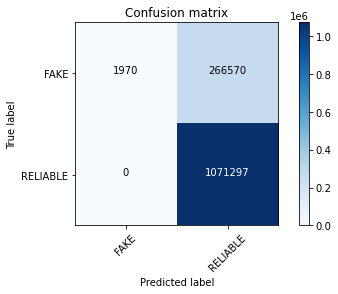

In [12]:
svm_pred = svm_model.predict(X_test)
svm_score = metrics.accuracy_score(Y_test, svm_pred)
print("Accuracy: ", svm_score)
svm_cm = metrics.confusion_matrix(Y_test, svm_pred)
plot_confusion_matrix(svm_cm, classes=['FAKE', 'RELIABLE'])

## Variations to SGD Classifier
- Different loss function (hinge to modified_huber)
- Different loss function (hinge to squared_hinge)
- Different loss function (hinge to perception)
- Different concrete penalites (l2 is default, l1, elasticnet)
- Vary alpha, the constant multiplied to regularization term
- Vary max_iter, the number of epochs
- Vary learning_rate (optimal is default, adaptive, invscaling)

### Using 'modified_huber' instead of 'hinge'

In [13]:
from sklearn.linear_model import SGDClassifier
svm_model_test1 = Pipeline([('tfidf', TfidfVectorizer(max_features=5000,ngram_range=(1,3))), ('svm', SGDClassifier(loss='modified_huber', alpha=1e-3, penalty='l2', random_state=42))])
svm_model_test1 = svm_model_test1.fit(X_train, Y_train)

Accuracy:  0.8114210907744748
Confusion matrix, without normalization


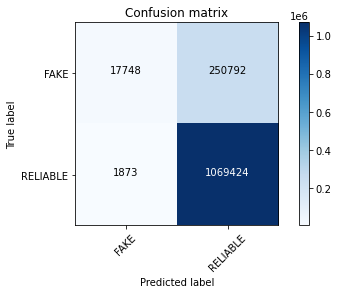

In [14]:
svm_pred_test1 = svm_model_test1.predict(X_test)
svm_score_test1 = metrics.accuracy_score(Y_test, svm_pred_test1)
print("Accuracy: ", svm_score_test1)
svm_cm_test1 = metrics.confusion_matrix(Y_test, svm_pred_test1)
plot_confusion_matrix(svm_cm_test1, classes=['FAKE', 'RELIABLE'])

### Using 'squared_hinge' instead of 'hinge'

In [15]:
from sklearn.linear_model import SGDClassifier
svm_model_test2 = Pipeline([('tfidf', TfidfVectorizer(max_features=5000,ngram_range=(1,3))), ('svm', SGDClassifier(loss='squared_hinge', alpha=1e-3, penalty='l2', random_state=42))])
svm_model_test2 = svm_model_test2.fit(X_train, Y_train)

Accuracy:  0.8114210907744748
Confusion matrix, without normalization


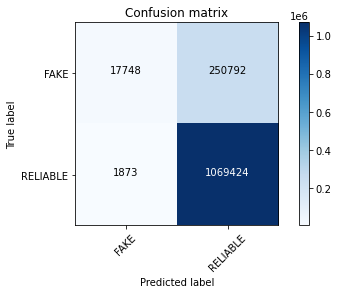

In [16]:
svm_pred_test2 = svm_model_test2.predict(X_test)
svm_score_test2 = metrics.accuracy_score(Y_test, svm_pred_test2)
print("Accuracy: ", svm_score_test2)
svm_cm_test2 = metrics.confusion_matrix(Y_test, svm_pred_test2)
plot_confusion_matrix(svm_cm_test2, classes=['FAKE', 'RELIABLE'])

### Using 'perceptron' instead of 'hinge'

In [17]:
from sklearn.linear_model import SGDClassifier
svm_model_test3 = Pipeline([('tfidf', TfidfVectorizer(max_features=5000,ngram_range=(1,3))), ('svm', SGDClassifier(loss='modified_huber', alpha=1e-3, penalty='l2', random_state=42))])
svm_model_test3 = svm_model_test3.fit(X_train, Y_train)

Accuracy:  0.8114210907744748
Confusion matrix, without normalization


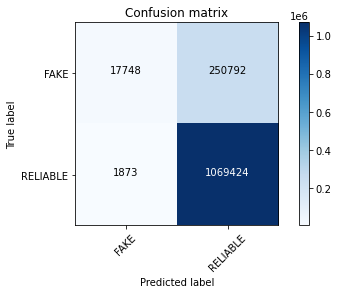

In [18]:
svm_pred_test3 = svm_model_test3.predict(X_test)
svm_score_test3 = metrics.accuracy_score(Y_test, svm_pred_test3)
print("Accuracy: ", svm_score_test3)
svm_cm_test3 = metrics.confusion_matrix(Y_test, svm_pred_test3)
plot_confusion_matrix(svm_cm_test3, classes=['FAKE', 'RELIABLE'])

## SVM with TF-IDF Vectorizer and Passive Aggressive Classifier

### Using preset TFIDF, n_iter_no_change=50 and default parameters for PassiveAggressive Classifier

In [19]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa_model = Pipeline([('tfidf', TfidfVectorizer(max_features=5000,ngram_range=(1,3))), ('passive_aggressive', PassiveAggressiveClassifier(n_iter_no_change=50))])


Accuracy:  0.7918522924803539
Confusion matrix, without normalization


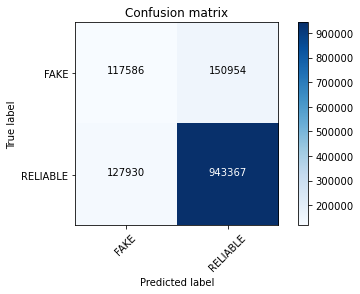

In [20]:
pa_model.fit(X_train, Y_train)
pa_pred = pa_model.predict(X_test)
pa_score = metrics.accuracy_score(Y_test, pa_pred)
print("Accuracy: ", pa_score)
pa_cm = metrics.confusion_matrix(Y_test, pa_pred)
plot_confusion_matrix(pa_cm, classes=['FAKE', 'RELIABLE'])

## Variations to PassiveAggressive Classifier
- Using 'squared_hinge' for loss instead of 'hinge'
- Using larger number of epochs (changing from 1000 to 5000)
- Both mentioned above

### Using 'squared_hinge' for loss instead of 'hinge'

In [21]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa_model_test = Pipeline([('tfidf', TfidfVectorizer(max_features=5000,ngram_range=(1,3))), ('passive_aggressive', PassiveAggressiveClassifier(n_iter_no_change=50, loss='squared_hinge'))])

Accuracy:  0.7898498100888391
Confusion matrix, without normalization


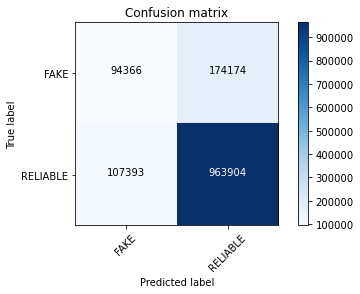

In [22]:
pa_model_test.fit(X_train, Y_train)
pa_pred_test = pa_model_test.predict(X_test)
pa_score_test = metrics.accuracy_score(Y_test, pa_pred_test)
print("Accuracy: ", pa_score_test)
pa_cm_test = metrics.confusion_matrix(Y_test, pa_pred_test)
plot_confusion_matrix(pa_cm_test, classes=['FAKE', 'RELIABLE'])

### Using larger number of epochs (changing from 1000 to 5000)

In [23]:
pa_model_test2 = Pipeline([('tfidf', TfidfVectorizer(max_features=5000,ngram_range=(1,3))), ('passive_aggressive', PassiveAggressiveClassifier(n_iter_no_change=50, max_iter=5000))])

Accuracy:  0.8089200402735557
Confusion matrix, without normalization


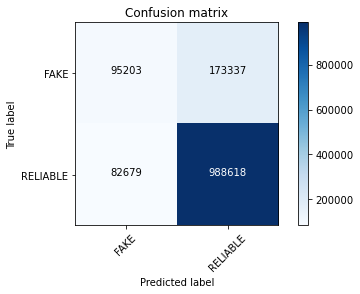

In [24]:
pa_model_test2.fit(X_train, Y_train)
pa_pred_test2 = pa_model_test2.predict(X_test)
pa_score_test2 = metrics.accuracy_score(Y_test, pa_pred_test2)
print("Accuracy: ", pa_score_test2)
pa_cm_test2 = metrics.confusion_matrix(Y_test, pa_pred_test2)
plot_confusion_matrix(pa_cm_test2, classes=['FAKE', 'RELIABLE'])

### Using larger number of epochs (changing from 1000 to 5000) and squared_hinge

In [25]:
pa_model_test3 = Pipeline([('tfidf', TfidfVectorizer(max_features=5000,ngram_range=(1,3))), ('passive_aggressive', PassiveAggressiveClassifier(n_iter_no_change=50, loss='squared_hinge' ,max_iter=5000))])

Accuracy:  0.7841349358168195
Confusion matrix, without normalization


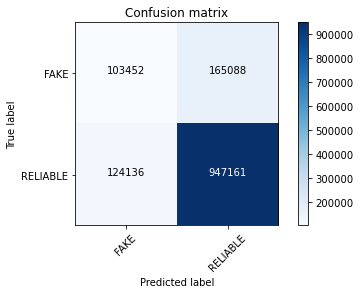

In [26]:
pa_model_test3.fit(X_train, Y_train)
pa_pred_test3 = pa_model_test3.predict(X_test)
pa_score_test3 = metrics.accuracy_score(Y_test, pa_pred_test3)
print("Accuracy: ", pa_score_test3)
pa_cm_test3 = metrics.confusion_matrix(Y_test, pa_pred_test3)
plot_confusion_matrix(pa_cm_test3, classes=['FAKE', 'RELIABLE'])

# Saving the model

In [27]:
import pickle

filename = 'combined_title_pa_model.sav'
pickle.dump(pa_model, open(filename, 'wb'))